In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd;
from collections import Counter
import numpy as np
import seaborn as sns
import datetime
import sklearn.cluster
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df_cc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ikea (1).csv')

name = df_cc['name']
uniq_names = Counter(name)


In [ ]:
frame_quality_type = df_cc['frame_quality_type'];
strength = df_cc['strength'];
flexibility = df_cc['flexibility'];
for i in range(len(name)):
  if (uniq_names[name[i]] <= 20):
    df_cc['short_description'][i] = 2 # Local furniture
  elif(uniq_names[name[i]] > 20 and uniq_names[name[i]] <= 50 ):
    df_cc['short_description'][i] = 1 # Imported furniture
  else:
    df_cc['short_description'][i] = 0 # Branded furniture

  if (frame_quality_type[i] < 30 or pd.isnull(frame_quality_type[i])):
    df_cc['frame_quality_type'][i] = 0
  elif (frame_quality_type[i] < 80 and frame_quality_type[i] >= 30):
    df_cc['frame_quality_type'][i] = 1
  else:
    df_cc['frame_quality_type'][i] = 2
  
  if (strength[i] < 30 or pd.isnull(strength[i])):
    df_cc['strength'][i] = 0
  elif (strength[i] < 80 and strength[i] >= 30):
    df_cc['strength'][i] = 1
  else:
    df_cc['strength'][i] = 2

  if (flexibility[i] < 30 or pd.isnull(flexibility[i])):
    df_cc['flexibility'][i] = 0
  elif (flexibility[i] < 80 and flexibility[i] >= 30):
    df_cc['flexibility'][i] = 1
  else:
    df_cc['flexibility'][i] = 2
  
  if (df_cc['other_colors'][i] == 'No'):
    df_cc['other_colors'][i] = 0
  else:
    df_cc['other_colors'][i] = 1
  
  if (df_cc['usability_status'][i]):
    df_cc['usability_status'][i] = 1
  else:
    df_cc['usability_status'][i] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A 

In [ ]:
df_cc = df_cc.drop(columns=['item_id', 'name', 'category'])


In [ ]:
df_cc.shape


(3694, 7)

In [ ]:
df_cc['usability_status'] = df_cc['usability_status'].apply(np.float64)
df_cc['short_description'] = df_cc['short_description'].apply(np.float64)
df_cc['other_colors'] = df_cc['other_colors'].apply(np.float64)
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               3694 non-null   float64
 1   other_colors        3694 non-null   float64
 2   short_description   3694 non-null   float64
 3   frame_quality_type  3694 non-null   float64
 4   strength            3694 non-null   float64
 5   flexibility         3694 non-null   float64
 6   usability_status    3694 non-null   float64
dtypes: float64(7)
memory usage: 202.1 KB


In [ ]:
df_cc.describe()

,price,other_colors,short_description,frame_quality_type,strength,flexibility,usability_status
count,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000
mean,1078.208419,0.409312,1.308609,0.649161,1.079589,1.243097,0.992420
std,1374.652494,0.491774,0.809868,0.649796,0.833336,0.755466,0.086744
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180.900000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,544.700000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,1429.500000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
max,9585.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


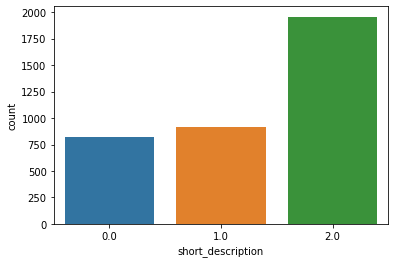

In [ ]:
sns.countplot('short_description', data=df_cc)

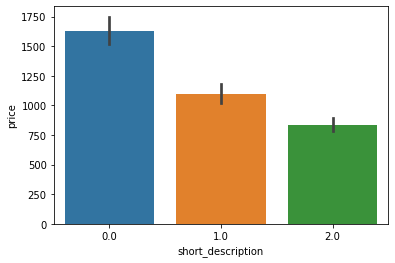

In [ ]:
sns.barplot(y='price', x='short_description', data=df_cc)

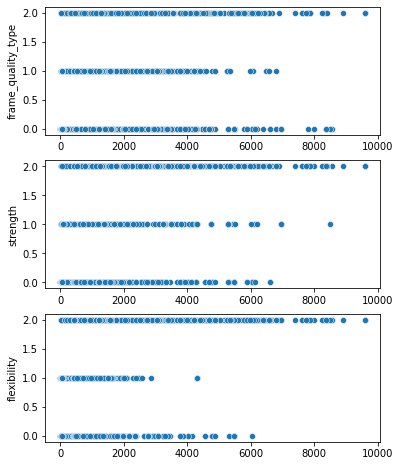

In [ ]:
measure = ['frame_quality_type',  'strength', 'flexibility']

fig, ax = plt.subplots(nrows = 3, figsize=[6,8])
for index, measure in enumerate(measure):
  sns.scatterplot(data=df_cc, x='price', y=measure, ax=ax[index])
  ax[index].set_ylabel(measure)
  ax[index].set_xlabel('')

Logistic Regression

In [ ]:
import keras
from keras.callbacks import EarlyStopping

y=df_cc['usability_status']
x=df_cc.drop(columns='usability_status')

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)
logisticRegr1 = LogisticRegression(class_weight="balanced")
#es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

logisticRegr1.fit(x_train, y_train)
THRESHOLD=0.50

predictions1 = np.where(logisticRegr1.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)

print(accuracy_score(y_test,predictions1))

0.6473317865429234


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions1)
print(confusion_matrix)


[[  4   5]
 [451 833]]


checking all computed attributes

In [ ]:
print(df_cc['usability_status'])
print(y_test)
print(predictions1)

0       1.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
3689    1.0
3690    1.0
3691    1.0
3692    1.0
3693    1.0
Name: usability_status, Length: 3694, dtype: float64
81      1.0
220     1.0
2668    1.0
324     1.0
1159    1.0
       ... 
665     1.0
946     1.0
897     1.0
1302    1.0
1890    1.0
Name: usability_status, Length: 1293, dtype: float64
[1 1 0 ... 0 1 1]


In [ ]:
check_y_test = Counter(y_test)
print(check_y_test)

Counter({1.0: 1284, 0.0: 9})


In [ ]:
pred = Counter(predictions1)
print(pred)

Counter({1: 838, 0: 455})


In [ ]:
a = df_cc['usability_status']
unique_names = Counter(a)
print(unique_names)

Counter({1.0: 3666, 0.0: 28})


Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


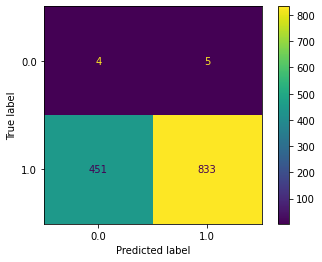

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logisticRegr1, x_test, y_test)

Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()      
reg.fit(x_train, y_train)

#linearpred = np.where(reg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
linearpred=reg.predict(x_test)
print(accuracy_score(y_test,predictions1))

0.6473317865429234
